In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('team_data.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

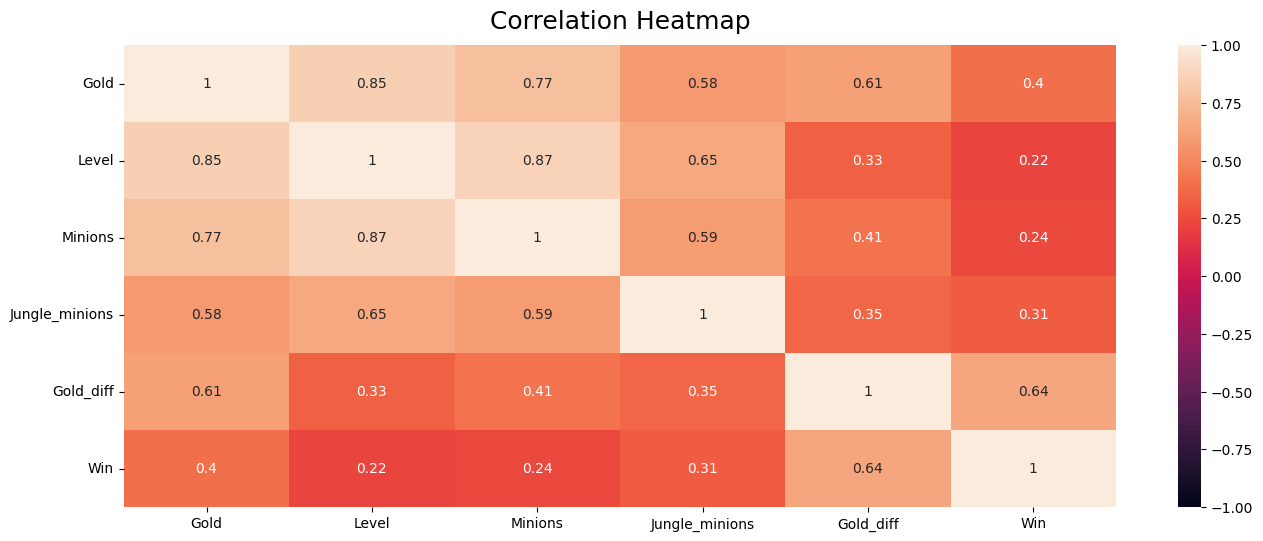

In [7]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

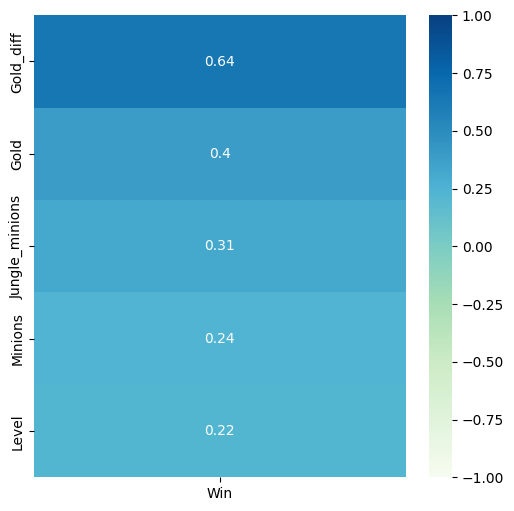

In [8]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [9]:
# Create functions to facilitate scaling, fiting and evaluating multiple 
# dataframes.

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    """
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics.

    Args:
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
        model (classifier object) : Model after fitting on training data.
    """
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [11]:
#We will first set the complete DataFrame and reduced DataFrames
x_keep_original = ['Level', 'Minions', 'Jungle_minions', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

x_keep_reduced = ['Level', 'Minions', 'Jungle_minions', 'Gold_diff']
X_reduced = df[x_keep_reduced]
y_reduced = df["Win"]

In [12]:
#Do the split for both the orginal and reduced DataFrames
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.33, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.33, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.8281    0.8548    0.8413        62
           1     0.8421    0.8136    0.8276        59

    accuracy                         0.8347       121
   macro avg     0.8351    0.8342    0.8344       121
weighted avg     0.8349    0.8347    0.8346       121

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7143    0.8621    0.7813        29
           1     0.8462    0.6875    0.7586        32

    accuracy                         0.7705        61
   macro avg     0.7802    0.7748    0.7699        61
weighted avg     0.7835    0.7705    0.7694        61

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


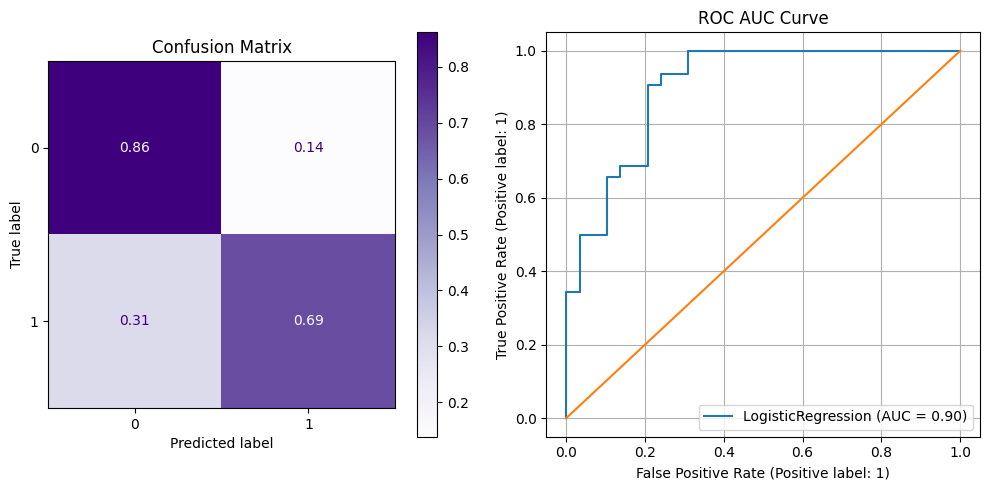

In [13]:
#Logisitc regression using the original df
log_select = fit_eval(LogisticRegression(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.8281    0.8548    0.8413        62
           1     0.8421    0.8136    0.8276        59

    accuracy                         0.8347       121
   macro avg     0.8351    0.8342    0.8344       121
weighted avg     0.8349    0.8347    0.8346       121

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7143    0.8621    0.7813        29
           1     0.8462    0.6875    0.7586        32

    accuracy                         0.7705        61
   macro avg     0.7802    0.7748    0.7699        61
weighted avg     0.7835    0.7705    0.7694        61

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


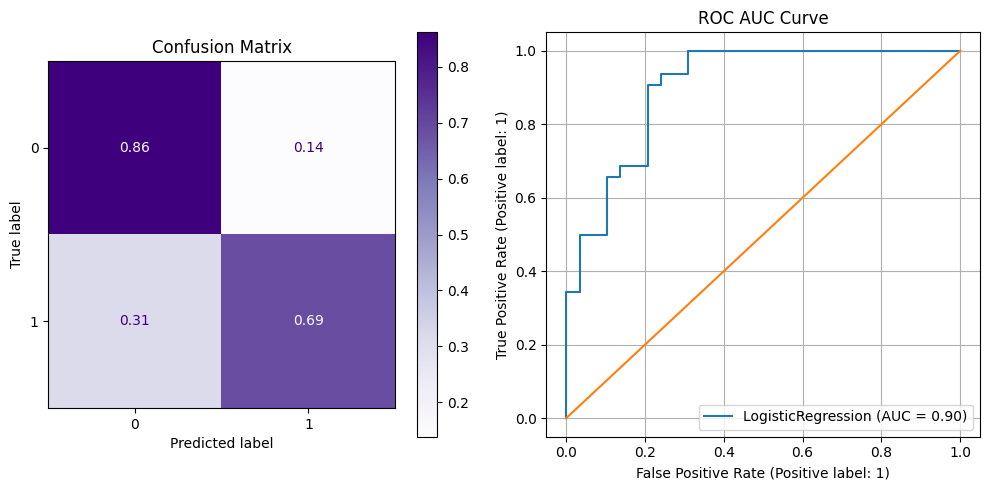

In [14]:
#Logisitc regression using the reduced df
log_select = fit_eval(LogisticRegression(), X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        62
           1     1.0000    1.0000    1.0000        59

    accuracy                         1.0000       121
   macro avg     1.0000    1.0000    1.0000       121
weighted avg     1.0000    1.0000    1.0000       121

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7097    0.7586    0.7333        29
           1     0.7667    0.7188    0.7419        32

    accuracy                         0.7377        61
   macro avg     0.7382    0.7387    0.7376        61
weighted avg     0.7396    0.7377    0.7378        61

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


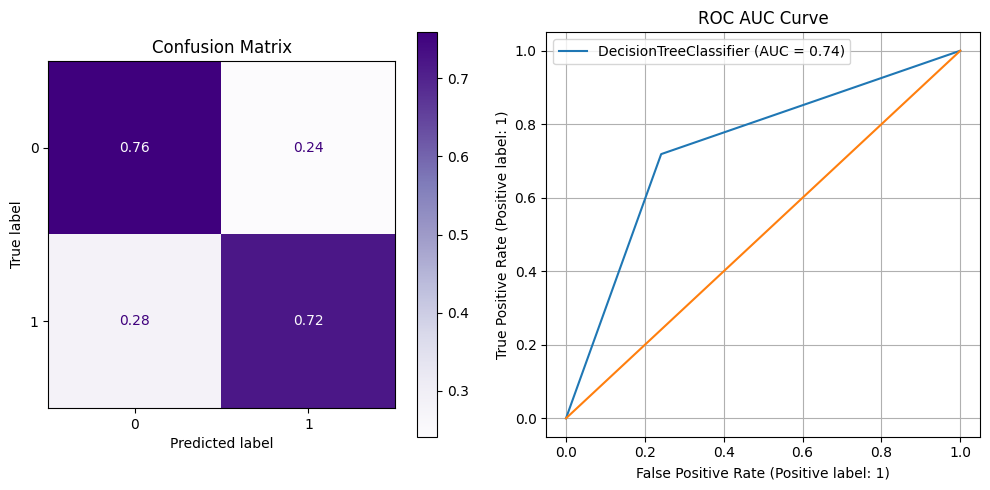

In [15]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        62
           1     1.0000    1.0000    1.0000        59

    accuracy                         1.0000       121
   macro avg     1.0000    1.0000    1.0000       121
weighted avg     1.0000    1.0000    1.0000       121

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6970    0.7931    0.7419        29
           1     0.7857    0.6875    0.7333        32

    accuracy                         0.7377        61
   macro avg     0.7413    0.7403    0.7376        61
weighted avg     0.7435    0.7377    0.7374        61

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


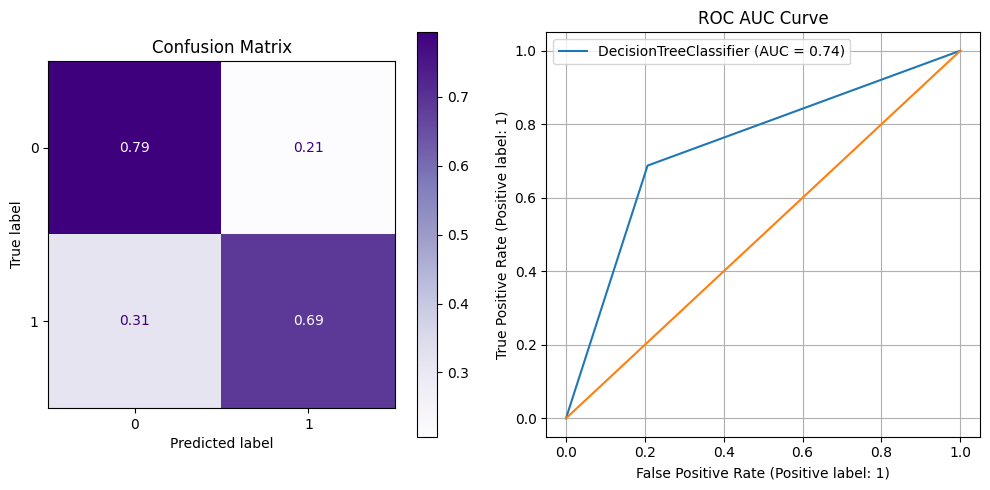

In [16]:
#Decision Tree using the reduced df
log_select = fit_eval(DecisionTreeClassifier(), X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        62
           1     1.0000    1.0000    1.0000        59

    accuracy                         1.0000       121
   macro avg     1.0000    1.0000    1.0000       121
weighted avg     1.0000    1.0000    1.0000       121

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7097    0.7586    0.7333        29
           1     0.7667    0.7188    0.7419        32

    accuracy                         0.7377        61
   macro avg     0.7382    0.7387    0.7376        61
weighted avg     0.7396    0.7377    0.7378        61

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


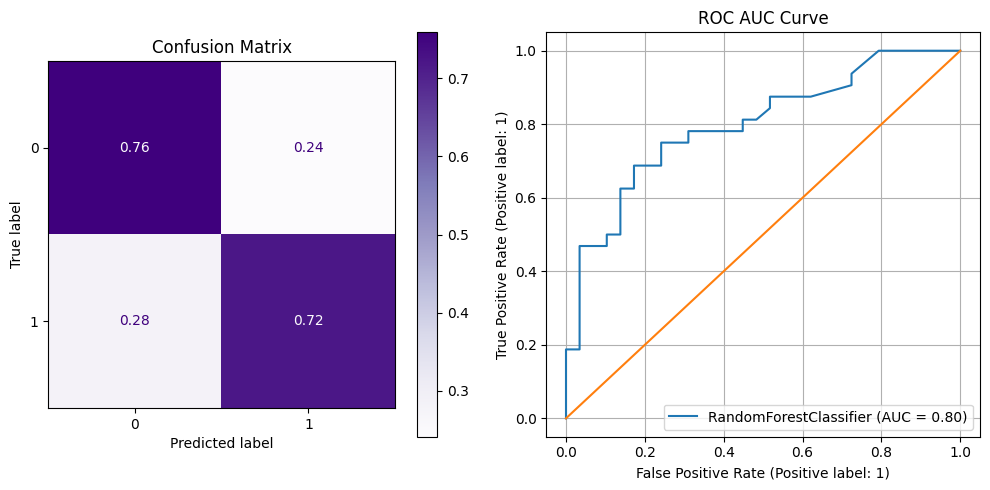

In [17]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        62
           1     1.0000    1.0000    1.0000        59

    accuracy                         1.0000       121
   macro avg     1.0000    1.0000    1.0000       121
weighted avg     1.0000    1.0000    1.0000       121

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6765    0.7931    0.7302        29
           1     0.7778    0.6562    0.7119        32

    accuracy                         0.7213        61
   macro avg     0.7271    0.7247    0.7210        61
weighted avg     0.7296    0.7213    0.7206        61

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


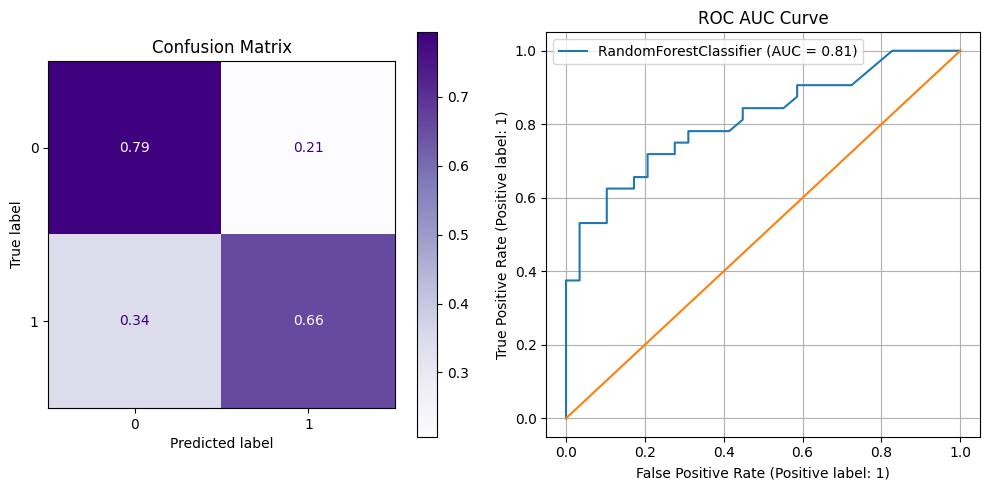

In [18]:
#Random Forest using the reduced df
log_select = fit_eval(RandomForestClassifier(), X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)